In [22]:
import math as m
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [23]:
#Setando names das colunas
array_indice = ['year', 'ISO_code', 'countries', 'index', 'rank', 'quartile', '1a_government_consumption', '1b_transfers', '1c_gov_enterprises', '1d_top_marg_tax_rate', '1_size_government', '2a_judicial_independence', '2b_impartial_courts', '2c_protection_property_rights', '2d_military_interference', '2e_integrity_legal_system', '2f_legal_enforcement_contracts', '2g_restrictions_sale_real_property', '2h_reliability_police', '2i_business_costs_crime', '2j_gender_adjustment', '2_property_rights', '3a_money_growth', '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency', '3_sound_money', '4a_tariffs', '4b_regulatory_trade_barriers', '4c_black_market', '4d_control_movement_capital_ppl', '4_trade', '5a_credit_market_reg', '5b_labor_market_reg', '5c_business_reg', '5_regulation']
#Setando array de colunas à serem ignoradas
array_indice_remove = ['ISO_code', 'countries', 'rank', 'index']
#Setando array sem os removidos
array_indice_correct = ['year', 'quartile', '1a_government_consumption', '1b_transfers', '1c_gov_enterprises', '1d_top_marg_tax_rate', '1_size_government', '2a_judicial_independence', '2b_impartial_courts', '2c_protection_property_rights', '2d_military_interference', '2e_integrity_legal_system', '2f_legal_enforcement_contracts', '2g_restrictions_sale_real_property', '2h_reliability_police', '2i_business_costs_crime', '2j_gender_adjustment', '2_property_rights', '3a_money_growth', '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency', '3_sound_money', '4a_tariffs', '4b_regulatory_trade_barriers', '4c_black_market', '4d_control_movement_capital_ppl', '4_trade', '5a_credit_market_reg', '5b_labor_market_reg', '5c_business_reg', '5_regulation']

#Sabemos que as informações importantes não possuem tantos problemas
#São elas:
#Os indices que são gerados com as informações do mesmo tipo
array_indice_importante = ['year', 'ISO_code', 'countries', 'index', 'rank', '1_size_government', '2_property_rights', '3_sound_money', '4_trade', '5_regulation']

In [24]:
indice = pd.read_csv('./csv/efw_cc.csv', header = 1, names = array_indice)

In [25]:
indice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                3725 non-null   int64  
 1   ISO_code                            3725 non-null   object 
 2   countries                           3725 non-null   object 
 3   index                               3002 non-null   float64
 4   rank                                3002 non-null   float64
 5   quartile                            3002 non-null   float64
 6   1a_government_consumption           3136 non-null   float64
 7   1b_transfers                        2765 non-null   float64
 8   1c_gov_enterprises                  3079 non-null   float64
 9   1d_top_marg_tax_rate                2678 non-null   float64
 10  1_size_government                   3078 non-null   float64
 11  2a_judicial_independence            2172 no

In [26]:
indice.describe()

,year,index,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,1_size_government,2a_judicial_independence,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
count,3725.000000,3002.000000,3002.000000,3002.000000,3136.000000,2765.000000,3079.000000,2678.000000,3078.000000,2172.000000,...,3114.000000,3044.000000,2377.000000,3108.000000,3133.000000,3034.000000,3106.000000,2567.000000,2323.000000,2997.000000
mean,2001.343893,6.519300,68.318454,2.498334,5.861670,7.672960,5.737252,5.812360,6.231508,5.020557,...,7.660011,7.078177,6.332510,9.114998,4.375750,6.719356,7.732727,6.168158,6.188347,6.638381
std,12.734571,1.133673,41.345560,1.118815,2.270208,2.139341,3.242647,2.654242,1.447894,2.249622,...,1.812789,1.821333,1.712689,2.461311,2.694235,1.720252,2.124074,1.509372,1.268699,1.240594
min,1970.000000,1.970000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.653797,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.837167,2.009841,1.002000
25%,1995.000000,5.852500,33.000000,1.000000,4.449290,6.205507,4.000000,4.000000,5.229256,3.261076,...,6.603819,6.207267,5.462136,10.000000,2.000000,5.946002,6.799238,5.072876,5.385959,5.877792
50%,2005.000000,6.680000,66.000000,3.000000,6.082353,8.433243,7.000000,6.000000,6.319357,4.698492,...,7.968243,7.480000,6.591888,10.000000,4.768376,7.010755,8.305793,6.195987,6.169383,6.759265
75%,2011.000000,7.350000,102.000000,3.000000,7.568575,9.482289,8.000000,8.000000,7.266427,6.824809,...,9.257092,8.333371,7.516114,10.000000,6.493590,7.916050,9.333333,7.346580,7.008254,7.486346
max,2016.000000,9.190000,162.000000,4.000000,10.000000,10.000000,10.000000,10.000000,9.904651,9.816667,...,9.922187,10.000000,9.833333,10.000000,10.000000,10.000000,10.000000,9.725000,9.503739,9.439828


In [27]:
#Iniciando análise de "missing values" [valores faltantes] contando em toda tabela 
indice.isnull().sum()

year                                     0
ISO_code                                 0
countries                                0
index                                  723
rank                                   723
quartile                               723
1a_government_consumption              589
1b_transfers                           960
1c_gov_enterprises                     646
1d_top_marg_tax_rate                  1047
1_size_government                      647
2a_judicial_independence              1553
2b_impartial_courts                   1179
2c_protection_property_rights         1129
2d_military_interference              1186
2e_integrity_legal_system             1153
2f_legal_enforcement_contracts        1361
2g_restrictions_sale_real_property    1384
2h_reliability_police                 2071
2i_business_costs_crime               2071
2j_gender_adjustment                    66
2_property_rights                      755
3a_money_growth                        644
3b_std_infl

In [28]:
#Com isso temos poucos casos com missing value nas colunas de importância
# indice = indice[indice['index'].notna()]
indice.dropna(subset = ['index'], inplace=True)
indice.isnull().sum()

year                                     0
ISO_code                                 0
countries                                0
index                                    0
rank                                     0
quartile                                 0
1a_government_consumption                7
1b_transfers                           279
1c_gov_enterprises                      84
1d_top_marg_tax_rate                   342
1_size_government                        9
2a_judicial_independence               830
2b_impartial_courts                    456
2c_protection_property_rights          416
2d_military_interference               463
2e_integrity_legal_system              437
2f_legal_enforcement_contracts         650
2g_restrictions_sale_real_property     673
2h_reliability_police                 1349
2i_business_costs_crime               1349
2j_gender_adjustment                     0
2_property_rights                       55
3a_money_growth                         16
3b_std_infl

In [29]:
#Ao dropar pelo indice (informação muito importante)
#É possível ver que as outras informações que são importantes possuem poucos missing values
#Então é melhor preencher os faltantes com a média
indice['1_size_government'].fillna((indice['1_size_government'].mean()), inplace=True)
indice['2_property_rights'].fillna((indice['2_property_rights'].mean()), inplace=True)
indice['3_sound_money'].fillna((indice['3_sound_money'].mean()), inplace=True)
indice['4_trade'].fillna((indice['4_trade'].mean()), inplace=True)
indice['5_regulation'].fillna((indice['5_regulation'].mean()), inplace=True)
indice.isnull().sum()

year                                     0
ISO_code                                 0
countries                                0
index                                    0
rank                                     0
quartile                                 0
1a_government_consumption                7
1b_transfers                           279
1c_gov_enterprises                      84
1d_top_marg_tax_rate                   342
1_size_government                        0
2a_judicial_independence               830
2b_impartial_courts                    456
2c_protection_property_rights          416
2d_military_interference               463
2e_integrity_legal_system              437
2f_legal_enforcement_contracts         650
2g_restrictions_sale_real_property     673
2h_reliability_police                 1349
2i_business_costs_crime               1349
2j_gender_adjustment                     0
2_property_rights                        0
3a_money_growth                         16
3b_std_infl

In [30]:
#Agora vamos fazer um dataset com apenas as colunas de importância
indice_importante = indice[array_indice_importante]
indice_importante.describe()

,year,index,rank,1_size_government,2_property_rights,3_sound_money,4_trade,5_regulation
count,3002.00000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000
mean,2003.85976,6.519300,68.318454,6.254504,5.258831,7.699283,6.761595,6.658452
std,10.95153,1.133673,41.345560,1.416221,1.768368,1.798650,1.672113,1.210011
min,1970.00000,1.970000,1.000000,1.190589,0.955583,0.000000,0.000000,1.578483
25%,2001.00000,5.852500,33.000000,5.263731,3.969165,6.659513,5.996687,5.915212
50%,2007.00000,6.680000,66.000000,6.330822,5.258831,8.019433,7.017455,6.754812
75%,2012.00000,7.350000,102.000000,7.266427,6.369216,9.271783,7.918651,7.486216
max,2016.00000,9.190000,162.000000,9.904651,9.278333,9.922187,10.000000,9.439828


In [31]:
#Verificando outliers para remoção
#Para isso vamos calcular o zscore para as colunas com valores estatísticos numéricos
indice_lib_eco = indice_importante
indice_lib_eco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 3720
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               3002 non-null   int64  
 1   ISO_code           3002 non-null   object 
 2   countries          3002 non-null   object 
 3   index              3002 non-null   float64
 4   rank               3002 non-null   float64
 5   1_size_government  3002 non-null   float64
 6   2_property_rights  3002 non-null   float64
 7   3_sound_money      3002 non-null   float64
 8   4_trade            3002 non-null   float64
 9   5_regulation       3002 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 234.5+ KB


In [32]:
#Calculando zscore para as colunas certas
for alias in ['1_size_government', '2_property_rights', '3_sound_money', '4_trade', '5_regulation']:
    alias_zscore = alias + '_zscore'
    #Mantendo zscore absoluto para a comparação de remoção ser mais simples
    indice_lib_eco[alias_zscore] = np.abs(stats.zscore(indice_lib_eco[alias]))

indice_lib_eco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 3720
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      3002 non-null   int64  
 1   ISO_code                  3002 non-null   object 
 2   countries                 3002 non-null   object 
 3   index                     3002 non-null   float64
 4   rank                      3002 non-null   float64
 5   1_size_government         3002 non-null   float64
 6   2_property_rights         3002 non-null   float64
 7   3_sound_money             3002 non-null   float64
 8   4_trade                   3002 non-null   float64
 9   5_regulation              3002 non-null   float64
 10  1_size_government_zscore  3002 non-null   float64
 11  2_property_rights_zscore  3002 non-null   float64
 12  3_sound_money_zscore      3002 non-null   float64
 13  4_trade_zscore            3002 non-null   float64
 14  5_regula

In [33]:
#Mantendo apenas colunas as quais todos os zscore calculados são menores que 3
comparacao1 = (indice_lib_eco['1_size_government_zscore'] < 3) & (indice_lib_eco['2_property_rights_zscore'] < 3) 
comparacao2 = (indice_lib_eco['3_sound_money_zscore'] < 3) & (indice_lib_eco['4_trade_zscore'] < 3) & (indice_lib_eco['5_regulation_zscore'] < 3)

indice_lib_eco_novo = indice_lib_eco[ comparacao1 & comparacao2 ]

indice_lib_eco_novo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2888 entries, 0 to 3720
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2888 non-null   int64  
 1   ISO_code                  2888 non-null   object 
 2   countries                 2888 non-null   object 
 3   index                     2888 non-null   float64
 4   rank                      2888 non-null   float64
 5   1_size_government         2888 non-null   float64
 6   2_property_rights         2888 non-null   float64
 7   3_sound_money             2888 non-null   float64
 8   4_trade                   2888 non-null   float64
 9   5_regulation              2888 non-null   float64
 10  1_size_government_zscore  2888 non-null   float64
 11  2_property_rights_zscore  2888 non-null   float64
 12  3_sound_money_zscore      2888 non-null   float64
 13  4_trade_zscore            2888 non-null   float64
 14  5_regula

<AxesSubplot:xlabel='index', ylabel='1_size_government'>

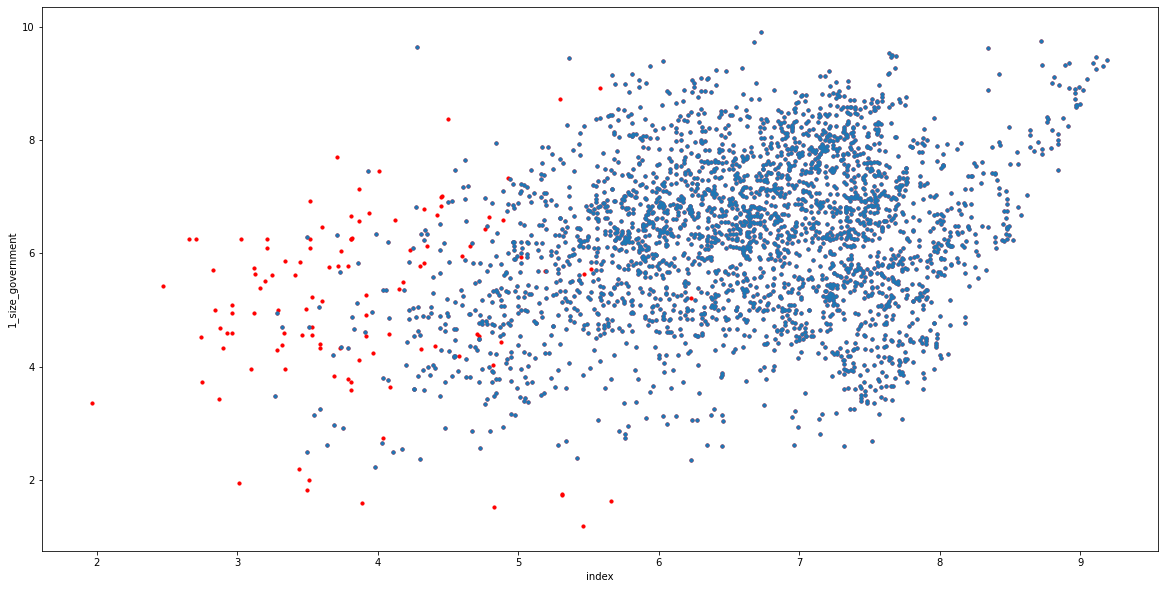

In [34]:
#Verificamos o scatter antes e depois para visualizar a tratativa de outliers
fig, ax = plt.subplots(1, 1, figsize=(20,10), sharex='col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=0)

indice_lib_eco.plot.scatter('index', '1_size_government', s=10, c='red', ax = ax)
indice_lib_eco_novo.plot.scatter('index', '1_size_government', s=10, ax = ax)

<AxesSubplot:xlabel='index', ylabel='2_property_rights'>

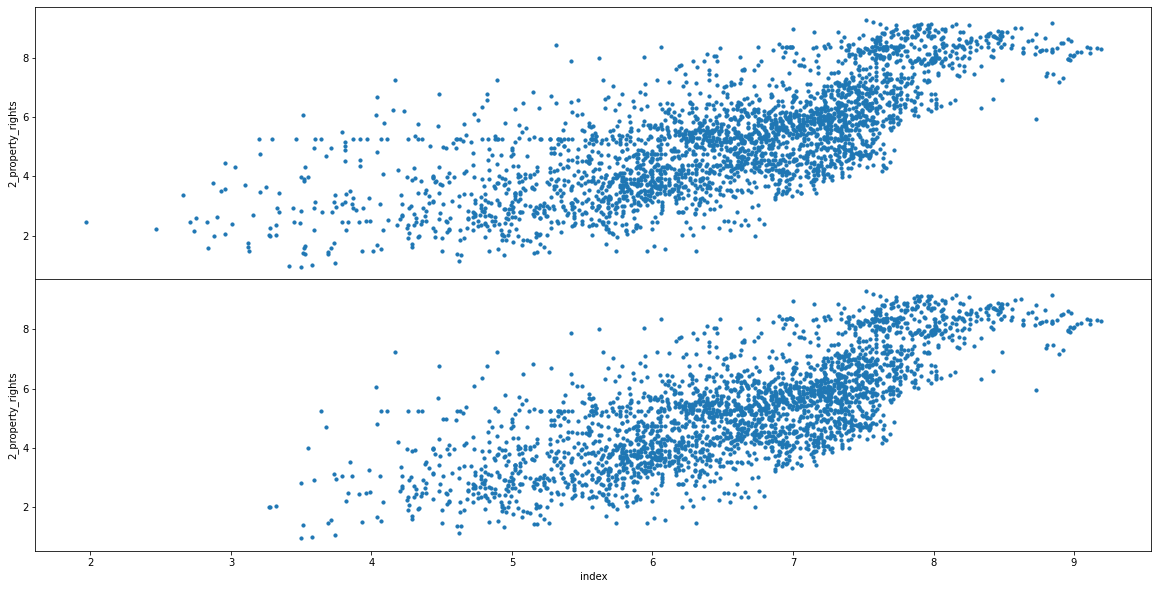

In [35]:
#Verificamos o scatter antes e depois para visualizar a tratativa de outliers
fig, ax = plt.subplots(2, 1, figsize=(20,10), sharex='col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=0)

indice_lib_eco.plot.scatter('index', '2_property_rights', s=10, ax = ax[0])
indice_lib_eco_novo.plot.scatter('index', '2_property_rights', s=10, ax = ax[1])

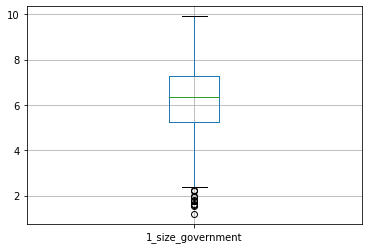

In [36]:
ax = indice_lib_eco.boxplot(['1_size_government'])

<AxesSubplot:>

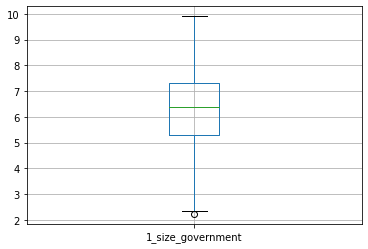

In [37]:
indice_lib_eco_novo.boxplot(['1_size_government'])

In [38]:
indice_lib_eco_novo.drop('1_size_government_zscore', inplace=True, axis=1)
indice_lib_eco_novo.drop('2_property_rights_zscore', inplace=True, axis=1)
indice_lib_eco_novo.drop('3_sound_money_zscore', inplace=True, axis=1)
indice_lib_eco_novo.drop('4_trade_zscore', inplace=True, axis=1)
indice_lib_eco_novo.drop('5_regulation_zscore', inplace=True, axis=1)
indice_lib_eco_novo.head()

C:\Users\lucas\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,year,ISO_code,countries,index,rank,1_size_government,2_property_rights,3_sound_money,4_trade,5_regulation
0,2016,DZA,Algeria,4.99,159.0,3.616782,4.690743,7.253894,4.127025,5.268992
1,2016,AGO,Angola,5.17,155.0,6.496685,2.963635,5.606605,5.264754,5.518500
2,2016,ARG,Argentina,4.84,160.0,5.346056,3.904030,5.614336,3.982547,5.369019
3,2016,ARM,Armenia,7.57,29.0,7.003310,5.809215,9.521940,8.143241,7.378069
4,2016,AUS,Australia,7.98,10.0,6.544178,7.919019,9.452540,7.526721,8.465526


In [39]:
indice_lib_eco_novo.to_csv(path_or_buf='./csv/indice_lib_eco.csv')